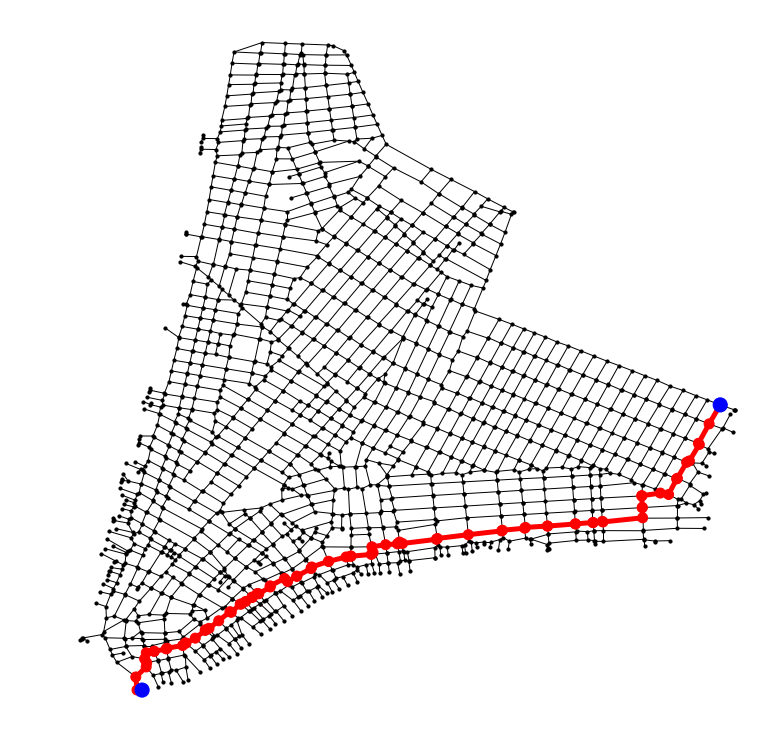

In [28]:
import math
import networkx as nx
import matplotlib.pyplot as plt
import re
import ast

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

def nodeDistance(n1, n2):
    x1 = n1[0]
    y1 = n1[1]
    x2 = n2[0]
    y2 = n2[1]
    
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def matchLine(line):
    match = re.match( r'^(.*)\|(.*)$', line)
    left = match.group(1)
    right = match.group(2)
    coords = ast.literal_eval(left)
    coords = (coords[1], -coords[0])
    return (left, coords, right)

def createGraphFromFile(filePath):
    G = nx.Graph()
    
    # Open the file and start reading line by line
    with open(filePath) as fp:  
        line = fp.readline()
        
        while line:
            # Skip the file header and/or empty lines
            if line[0] != "(":
                line = fp.readline()
                continue
                
            # Match the line to a regex to extract node data
            (parentNode, parentNodeCoords, numEdges) = matchLine(line)
            if int(numEdges) != 0:
                G.add_node(parentNode, pos=parentNodeCoords)
                
            # Add edges to the graph
            for i in range(int(numEdges)):
                line = fp.readline()
                (edgeNode, edgeNodeCoords, meta) = matchLine(line)
                G.add_node(edgeNode, pos=edgeNodeCoords)
                G.add_edge(parentNode, edgeNode, distance=nodeDistance(parentNodeCoords, edgeNodeCoords))
            
            line = fp.readline()
    
    return G

# Draw underlying graph
#G = createGraphFromFile("mapOutputs/TestMap.txt")
G = createGraphFromFile("mapOutputs/a_junius_fullres_black-and-white_#2_23h41m54s/Graph Detection_guo_hall_graph_detection_fullres_black-and-white.txt")
#nx.draw(G, nx.get_node_attributes(G, 'pos'), node_size=10, node_color="black", with_labels=True, font_size=5)
nx.draw(G, nx.get_node_attributes(G, 'pos'), node_size=10, node_color="black")

# Arbitrary start and end coordinates
#startCoordinates = "(2, 3)"
#endCoordinates = "(229, 313)"
startCoordinates = "(5215, 6383)"
endCoordinates = "(8236, 1132)"


# Get path using Dijkstra's algorithm
path = nx.dijkstra_path(G, startCoordinates, endCoordinates, 'distance')

# Get edges, colors, and positions of shortest path nodes
pos = {}
edges = []
colorMap = []
sizeMap = []
for i, val in enumerate(path):
    pos[val] = G.node[val]['pos']
    
    if i+1 < len(path):
        edges.append((path[i], path[i+1]))
    if i == 0 or i == len(path)-1:
        colorMap.append("blue")
        sizeMap.append(200)
    else:
        colorMap.append("red")
        sizeMap.append(100)

# Draw the shortest path
nx.draw_networkx_nodes(G, pos, nodelist=path, node_color=colorMap, node_size=sizeMap)
nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='r', width=5); # semicolon to suppress output
